In [4]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import numpy as np
import math
import comparison as cmp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm; 
import matplotlib.mlab as mlab
import matplotlib.image as mpimg

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pycwt as wavelet; mother = wavelet.Morlet(6)
from scipy import stats
import read_data as rd;   import time2frequency as t2f
import behavior_track as bt ; import behavior_plot as bp ; import turning_track  as tt
import philters
import bandpower as bpr
fps = 30; fs_out = 1000; fs = 30000; T = 1/fs_out;
N = int((1/fps)/T/2+1);

mode = 'FFT'
f = np.load('Rats/freqs_'+mode+'_'+str(fs_out)+'.npy');x_fit = np.log10(f); 
T_pre = 0


idx_band = np.load('Rats/idx_band.npy'); f_band = f[idx_band];  l_fb = len(f_band)

T1 = np.load('Rats/T1.npy');  T2 = np.load('Rats/T2.npy');

t = np.arange(T_pre+T2).astype('int')/fps;

sgn   = ['***','**','*']; P_sgn = np.array([0.0001, 0.001, 0.05])

idx_bt_1 = np.load('Rats/idx_bt_1.npy')
idx_bt_2 = np.load('Rats/idx_bt_2.npy')
idx_bf_l = np.load('Rats/idx_bf_l.npy');
idx_bf_h = np.load('Rats/idx_bf_h.npy');
clr = ['r','b','g','k','orange','pink','purple']

D:\Dropbox\Lab\MotorCortex
D:\Dropbox\Lab\MotorCortex


(1133, 2374, 4)
(1133, 2026, 4) 

(429, 2686, 4)
(429, 2200, 4) 

(1463, 2026, 4)
(1133, 2026, 4) 

(428, 2754, 4)
(428, 2200, 4) 



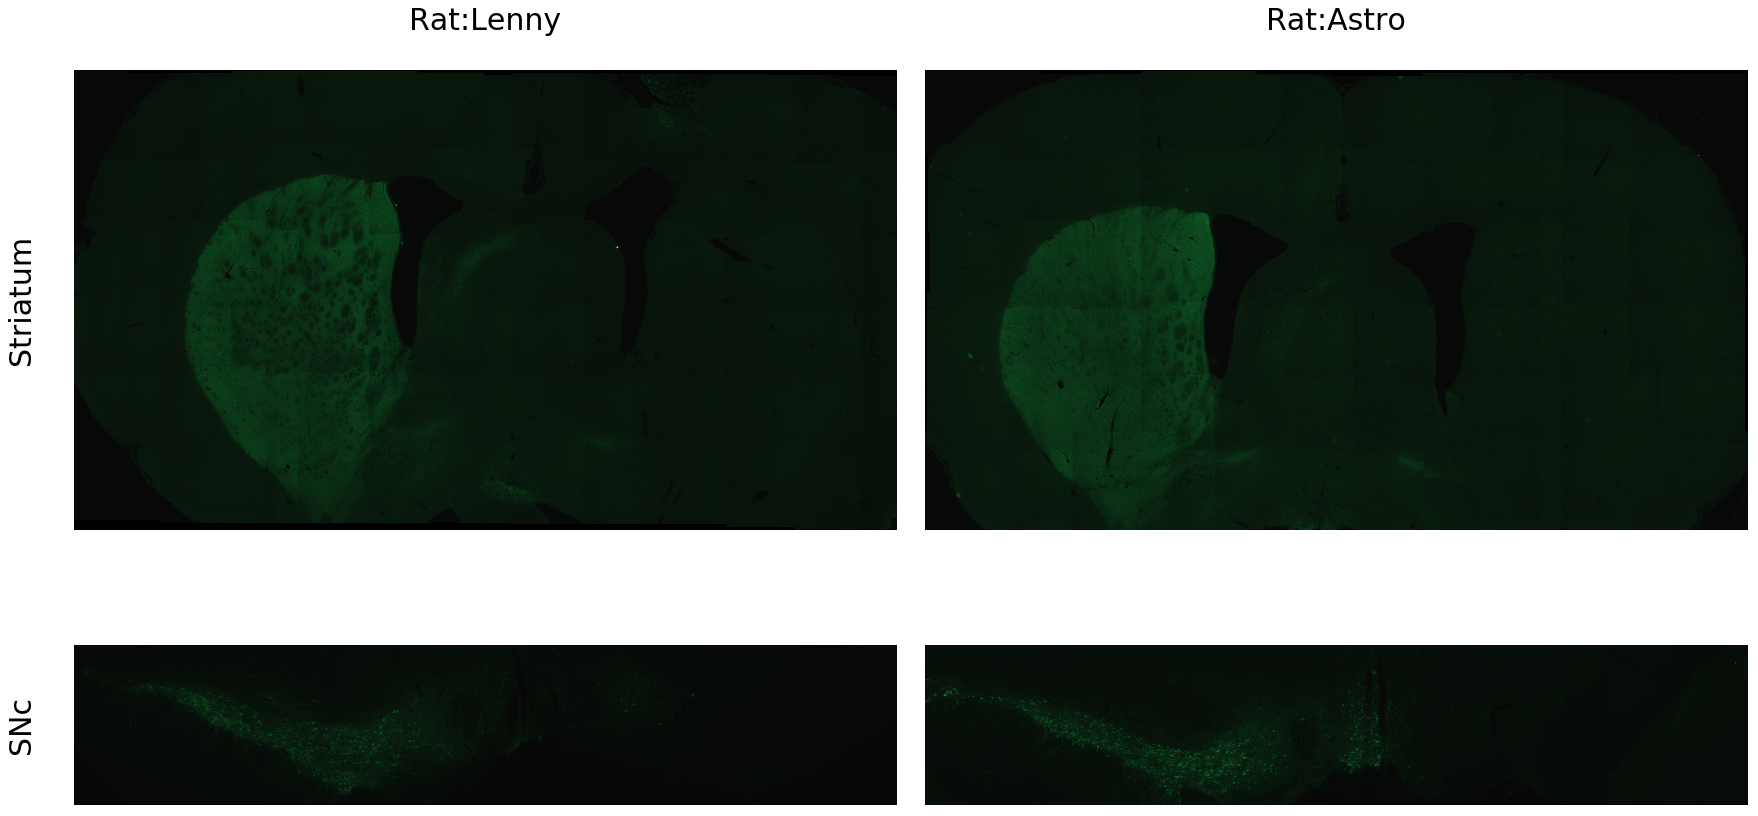

In [6]:
fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(15); fig.set_figwidth(30)
gs  = GridSpec(4, 10);
Fontsize = 30

ax_idx = gs[0:3,0:5]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('Striatum'+'\n',fontsize=Fontsize);ax.set_title('Rat:Lenny'+'\n',fontsize=Fontsize)
img=mpimg.imread('thesis_figure/Lenny_striatum.tif');print(img.shape)
img = img[:,150:150+2026,:];print(img.shape,'\n')
ax.imshow(img)
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.set_xticks([]);ax.set_yticks([])

ax_idx = gs[3,0:5]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('SNc'+'\n',fontsize=Fontsize)
img=mpimg.imread('thesis_figure/Lenny_SNc_section.tif');print(img.shape)
img = img[:,200:200+2200,:];print(img.shape,'\n')
ax.imshow(img)
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.set_xticks([]);ax.set_yticks([])


ax_idx = gs[0:3,5:10]; ax = fig.add_subplot(ax_idx);
ax.set_title('Rat:Astro'+'\n', fontsize=Fontsize)
img=mpimg.imread('thesis_figure/Astro_striatum.tif');print(img.shape)
img = img[0:1133,:,:];print(img.shape,'\n')
ax.imshow(img)
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.set_xticks([]);ax.set_yticks([])



ax_idx = gs[3,5:10]; ax = fig.add_subplot(ax_idx);
img=mpimg.imread('thesis_figure/Astro_SNc_section.tif');print(img.shape)
img = img[:,200:200+2200,:];print(img.shape,'\n')
ax.imshow(img)

ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.set_xticks([]);ax.set_yticks([])

plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/histology.png')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/histology.eps')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/histology.svg')

In [ ]:
epn   = np.load(rfdn+'tracking'+'/epn_ephy.npy')

Rats/Rat_Outlaw/
_pre
Outlaw 1 [4]
14


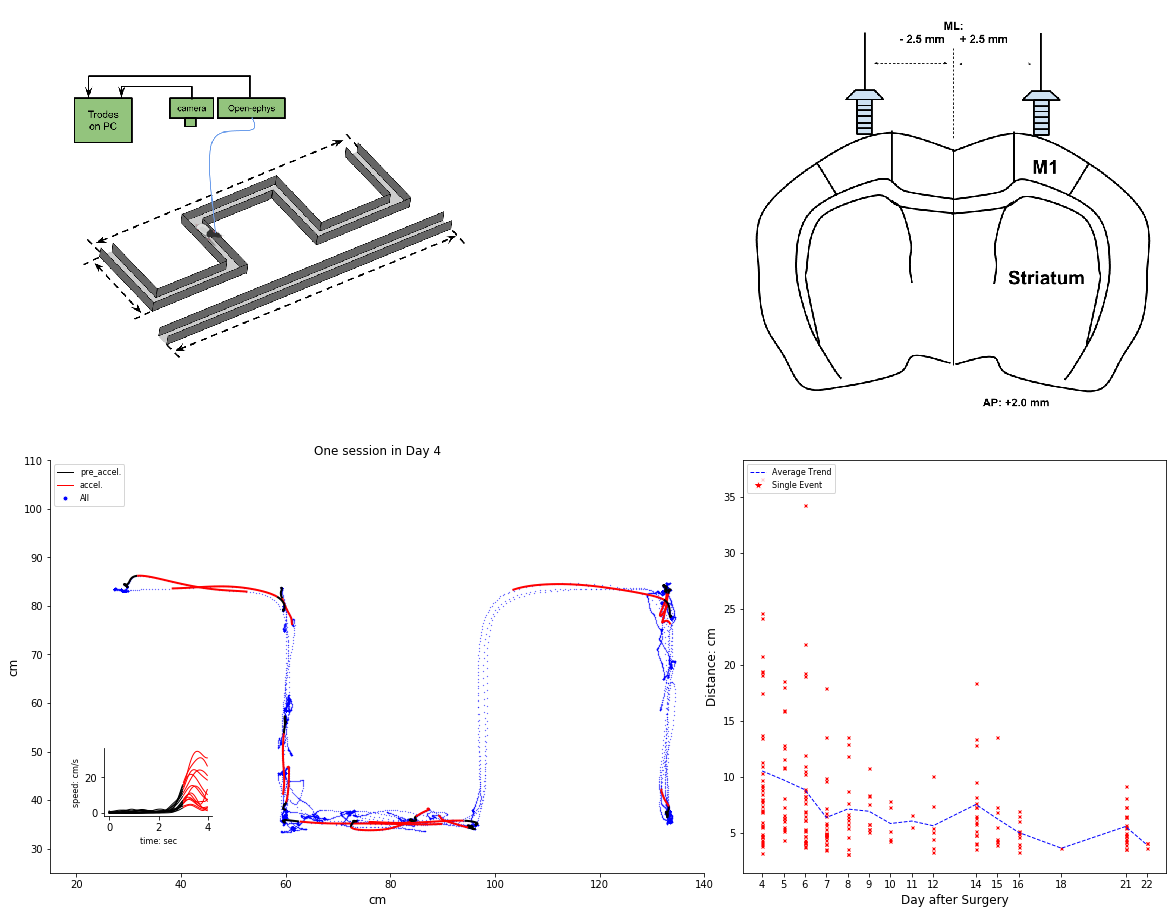

In [3]:
import matplotlib.image as mpimg



fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(20); fig.set_figwidth(20)
gs  = GridSpec(5, 5);

ax_idx = gs[0:2,3:5]; ax = fig.add_subplot(ax_idx);
img=mpimg.imread('thesis_figure/RecordingSlice.png')
ax.imshow(img)
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.set_xticks([]);ax.set_yticks([])

ax_idx = gs[0:2,0:2]; ax = fig.add_subplot(ax_idx);
img=mpimg.imread('thesis_figure/recording&trackmodel.png')
ax.imshow(img)
ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.set_xticks([]);ax.set_yticks([])

erfdn = np.load('Rats/Rats_ephy.npy')
rr = 0
rfdn = erfdn[1]
epn   = np.load(rfdn+'tracking'+'/epn_ephy.npy')
epn_date   = np.load(rfdn+'tracking'+'/epn_ephy_date.npy').astype('int')
date = np.arange(epn_date.min(),epn_date.max()+1);
date_true = date<0
l_t = len(date)
r_date = np.zeros((l_t,))
d_date = np.zeros((l_t,))
# d_date = np.empty((l_t,),dtype=object)
n_r_date = np.zeros((l_t,))
n_d_date = np.zeros((l_t,))
#     xtk    = np.empty((0,))
#     xticklabel = [];
print(rfdn)
idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy');
ax_idx = gs[2:4,3:5]; ax = fig.add_subplot(ax_idx);
kk = 0
for k in epn:
    epn_date_k = epn_date[kk]
    
    n_r_date[date==epn_date_k] = n_r_date[date==epn_date_k]+1

    fdn = rfdn + k + '/'
    ts_f        = np.load(fdn+'tracking/ts_f.npy');
    idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
    idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
    dis_ac      = np.load(fdn+'tracking/dis_ac.npy');
    n_acc = len(idx_acc_f)
    if n_acc>0:
        


        idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
        idx_acc_f     = idx_acc_f[idx_acc_f_T_k]
        dis_ac        = dis_ac[idx_acc_f_T_k]
        n_acc = len(idx_acc_f)
        
        
        if n_acc>0:
            date_true[date==epn_date_k] = True
            n_d_date[date==epn_date_k] = n_d_date[date==epn_date_k] + len(idx_acc_f)

            if np.sum(dis_ac)==0:
                print(k,epn_date_k,n_acc, dis_ac, len(idx_acc_f))
            d_date[date==epn_date_k] = d_date[date==epn_date_k] + np.sum(dis_ac)
            ax.plot(epn_date_k*np.ones((len(dis_ac),)), dis_ac,'x', ms = 3, color=clr[rr])
        kk = kk+1
ax.plot(date[date_true], d_date[date_true]/n_d_date[date_true],'b--', lw = 1, color=clr[1])
# ax.plot(date[date_true], d_date[date_true]/n_d_date[date_true],'bx', ms = 10, color=clr[1])
rr = rr+1
ax.set_xticks(date[date_true]);
ax.set_xlabel('Day after Surgery', fontsize=12)
ax.set_ylabel('Distance: cm', fontsize=12)
# ax.set_ylim([0,25])


preacc = Line2D([0], [0], color='b', ls = '--', lw=1,    label='Average Trend')
track  = Line2D([0], [0], color='w', marker='*', markerfacecolor='r', ms= 10 , label='Single Event')
ax.legend(handles=[preacc, track], loc='upper left', fontsize = 8)




ax_idx = gs[2:4,0:3]; ax = fig.add_subplot(ax_idx);
rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')[[1]];
n_r = len(erfdn)
rr = 0

for rfdn in erfdn:
    
    epn      = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')[[1]]
    epn_date = np.load(rfdn+'tracking'+'/epn_ephy_date.npy')[[1]].astype('int')
    print(rfdn[9:len(rfdn)-1], len(epn), epn_date)
    n_k = len(epn)

    spd_f_ac = np.empty((0, T2+T_pre))
    n_acc_total = 0
    
    lag_m       = np.load(rfdn+'tracking/lag_m.npy')
    idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
    
    kk = 0
    for k in epn:
        

        ax2 = inset_axes(ax, width="55%", height="55%",
#                   bbox_to_anchor=(30, 30, 10, 10),
                    bbox_to_anchor=(.075, .125, .3, .3),
                   bbox_transform=ax.transAxes,
                            loc=3)
        
        fdn = rfdn + k + '/'
        pos_Y = np.load(fdn+'tracking/'+'pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/'+'pos_X_f.npy')
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 15
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')



        idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
        T_acc_f     = np.load(fdn+'tracking/T_acc_f.npy');
        idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
        n_acc = len(idx_acc_f)
        if n_acc>0:
            lag   = lag_m[idx_acc_f_k];
            idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
            lag       = lag[idx_acc_f_T_k]
            T_acc_f   = T_acc_f[idx_acc_f_T_k]
            idx_acc_f = idx_acc_f[idx_acc_f_T_k]
            n_acc = len(idx_acc_f)
            n_acc_total = n_acc_total+n_acc
            if n_acc>0:
                
                ax.plot(pos_X, pos_Y, '.b', ms= 0.5)
                ax.set_xlim([15,140]);ax.set_ylim([25,110])
                ax.set_xlabel('cm', fontsize=12);ax.set_ylabel('cm', fontsize=12)
                ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
                ax.set_title('One session in Day ' + str(epn_date[kk]), fontsize=12)
                
                idx_acc_f = idx_acc_f+T_acc_f-lag
                
                for i in np.arange(len(idx_acc_f)):
                    t_ref = idx_acc_f[i]
                    idx_t_spec = np.arange(t_ref-T_pre,t_ref+T1).astype('int')
                    ax.plot(pos_X[idx_t_spec], pos_Y[idx_t_spec], 'k', lw=2)
                    ax2.plot(t[0:T_pre+T1], spd_f[idx_t_spec], 'k', lw=1)
                    
                    idx_t_spec = np.arange(t_ref+T1,t_ref+T2).astype('int')
                    ax.plot(pos_X[idx_t_spec], pos_Y[idx_t_spec], 'r', lw=2)
                    ax2.plot(t[T1:T2],      spd_f[idx_t_spec], 'r', lw=1)
                ax2.set_xlabel('time: sec', fontsize = 8);
                ax2.set_ylabel('speed: cm/s', fontsize = 8)
                ax2.spines['right'].set_visible(False); ax2.spines['top'].set_visible(False)
    
        kk += 1
    print(n_acc_total)
    rr += 1




preacc = Line2D([0], [0], color='k', ls = '-', lw=1,    label='pre_accel.')
acc    = Line2D([0], [0], color='r', ls = '-', lw=1,   label='accel.')
track  = Line2D([0], [0], color='w', marker='.', markerfacecolor='b', ms= 10 , label='All')
ax.legend(handles=[preacc, acc, track], loc='upper left', fontsize = 8)